In [ ]:
!pip install keras

In [ ]:
!pip install scikit-learn

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('/home/PETR4.csv')


In [ ]:
#removendo os dados NaN
base = base.dropna()

In [ ]:
#iloc seleciona a coluna "OPEN" (preço de abertura) que está na posição coluna=1
base_treinamento = base.iloc[:, 1:2].values


In [ ]:
base_treinamento

array([[15.21],
       [15.36],
       [15.06],
       ...,
       [25.26],
       [25.33],
       [25.4 ]])

In [ ]:
#normalizando os dados entre 0 e 1
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [ ]:
base_treinamento_normalizada

array([[0.45760599],
       [0.4638404 ],
       [0.45137157],
       ...,
       [0.87531172],
       [0.87822111],
       [0.88113051]])

In [ ]:
#vamos pegar uma fatia de 90 amostras e tentar prever a 91ª e assim sucessivamente
previsores = []
preco_real = []
for i in range(90, len(base_treinamento_normalizada)):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])

In [ ]:
previsores

[array([0.45760599, 0.4638404 , 0.45137157, 0.44389027, 0.43391521,
        0.43183707, 0.40897756, 0.41354946, 0.40482128, 0.41853699,
        0.42227764, 0.43682461, 0.45220283, 0.439734  , 0.43682461,
        0.43433084, 0.4247714 , 0.4081463 , 0.40980881, 0.4156276 ,
        0.41188695, 0.42601829, 0.4156276 , 0.39983375, 0.41147132,
        0.39484622, 0.38320865, 0.38362427, 0.37697423, 0.36824605,
        0.37032419, 0.38196176, 0.36907731, 0.36076475, 0.35078969,
        0.36367415, 0.37531172, 0.38445553, 0.41438071, 0.41812136,
        0.43017456, 0.42352452, 0.47256858, 0.47838736, 0.47880299,
        0.47838736, 0.47090607, 0.47464672, 0.47797174, 0.52369073,
        0.48669992, 0.47630923, 0.47090607, 0.50207818, 0.4804655 ,
        0.47339983, 0.48628429, 0.50332498, 0.48919368, 0.49875316,
        0.48836243, 0.48836243, 0.51870324, 0.51537822, 0.51330004,
        0.55901912, 0.54987531, 0.57938483, 0.59850374, 0.57564418,
        0.57148799, 0.57356608, 0.57190353, 0.58

In [ ]:
preco_real

[0.555694098088113,
 0.5752286367414795,
 0.6026600581878636,
 0.5997505818786367,
 0.6151288445552784,
 0.6005818786367413,
 0.5906068162926017,
 0.6005818786367413,
 0.6047381546134662,
 0.5856193266832916,
 0.5403159185369908,
 0.5515377805486283,
 0.5423940149625934,
 0.5469659600997505,
 0.5465502909393183,
 0.5399002909393182,
 0.5278470490440563,
 0.5498753117206981,
 0.5490440565253532,
 0.5469659600997505,
 0.5644223192019948,
 0.5764754779717373,
 0.5935162094763091,
 0.6192851205320032,
 0.6296758104738154,
 0.6234414380714879,
 0.6903573981712385,
 0.6745635910224438,
 0.6940980881130505,
 0.6799667082294264,
 0.6716542394014962,
 0.6737323358270988,
 0.6803823773898586,
 0.6608478802992518,
 0.6442228179551122,
 0.6400665004156275,
 0.6155444721529509,
 0.6213632585203656,
 0.6342476724854529,
 0.6500415627597671,
 0.6816292601828761,
 0.6483790108063174,
 0.63050710723192,
 0.6604322527015792,
 0.6463009143807148,
 0.6018287614297588,
 0.6109725685785534,
 0.6795510806317

In [ ]:
#convertendo para numpy array
previsores, preco_real = np.array(previsores), np.array(preco_real)
#                                      linhas          colunas          dimensão
previsores =np.reshape(previsores,(previsores.shape[0], previsores.shape[1], 1))


In [ ]:
previsores.shape[1]

90

In [ ]:
#criando a rede neural recorrente
regressor = Sequential()

'''
criando uma camada recorrente LSTM com 100 unidades de memória
o parâmetro return_sequence informa que enviaremos a saída da
função de ativação para a camada de neurônios à frente.
No input_shape informamos o tamanho da entrada (90) e a saída (1)
'''
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
#Criando um dropout (abandono) que vai zerar aleatoriamente o peso de 30% de alguns neurônios evitando overfitting
regressor.add(Dropout(0.3))
#mais informações: https://lamfo-unb.github.io/2017/10/22/Monte-Carlo-Dropout/#:~:text=Dropout%20(Srivastava%20et%20al%2C%20%E2%80%8E,nas%20camadas%20da%20rede%20neural.

#Criando mais duas camadas recorrentes com 50 unidades de memória
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))


#Criando última camada recorrente de saída
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

#Criando uma camada densa com função de ativação linear (pode até mesmo ser sigmóide)
regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


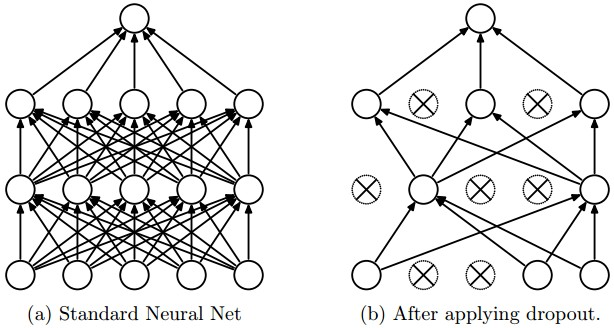

In [ ]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step - loss: 0.0531 - mean_absolute_error: 0.1679
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - loss: 0.0175 - mean_absolute_error: 0.0999
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0151 - mean_absolute_error: 0.0937
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - loss: 0.0393 - mean_absolute_error: 0.1204
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - loss: 0.0110 - mean_absolute_error: 0.0803
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - loss: 0.0089 - mean_absolute_error: 0.0696
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - loss: 0.0091 - mean_absolute_error: 0.0705
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - loss: 0.0090 - mean_absolute_error: 0.0724
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - loss: 0.0074 - mean_absolute_error: 0.0648
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - loss: 0.0076 - mean_absolute_error: 0.0640
Epoch 11/1

In [ ]:
base_teste = pd.read_csv('/home/PETR4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values

print(preco_real_teste)

[[25.290001]
 [25.25    ]
 [25.809999]
 [25.870001]
 [25.5     ]
 [25.84    ]
 [25.91    ]
 [25.799999]
 [25.6     ]
 [24.799999]
 [25.17    ]
 [25.32    ]
 [26.02    ]
 [26.17    ]
 [26.860001]
 [26.59    ]
 [26.860001]
 [27.5     ]
 [27.18    ]
 [27.549999]
 [27.      ]
 [26.76    ]
 [26.84    ]
 [27.719999]
 [27.139999]
 [26.549999]
 [26.799999]
 [26.49    ]
 [27.02    ]
 [27.790001]
 [27.59    ]
 [28.15    ]
 [28.16    ]
 [28.35    ]
 [28.85    ]
 [29.200001]
 [28.84    ]
 [27.940001]
 [26.83    ]
 [27.74    ]
 [28.209999]
 [27.25    ]
 [28.450001]
 [28.4     ]
 [28.139999]
 [28.530001]
 [27.77    ]
 [28.540001]
 [29.059999]
 [29.030001]
 [29.549999]
 [28.700001]
 [26.469999]
 [26.35    ]
 [25.950001]
 [27.120001]
 [27.360001]
 [27.690001]
 [27.719999]
 [27.719999]
 [27.450001]
 [27.68    ]
 [27.549999]
 [27.52    ]
 [26.799999]
 [26.9     ]
 [26.389999]
 [26.65    ]
 [26.309999]
 [27.1     ]
 [26.870001]
 [26.209999]
 [26.17    ]
 [25.74    ]
 [25.77    ]
 [25.049999]
 [24.68    ]

In [ ]:
'''
Precisamos normalizar os dados da base de teste.
Porém, não podemos simplesmente aplicar o normalizador, pois a base de
teste pode ter valores máximos e mínimos diferente da base de treinamento.

Para isso, vamos unir as duas bases (concatenar) pela coluna (axis=0) Open
(que é o que queremos prever, ou seja, qual será o preço de abertura daquela
 ação)
'''
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [ ]:

print("Base treinamento: {}\nBase teste: {}\nBase completa: {}".format(
    len(base_treinamento), len(base_teste), len(base_completa))
)

Base treinamento: 1243
Base teste: 248
Base completa: 1491


In [ ]:
#base_completa==1491
#base_teste == 248
#inicio == 1491 -248 -90  == 1153
inicio = len(base_completa) - len(base_teste) - 90
print(inicio)

1153


In [ ]:
#vamos pegar então nossa base de dados completa e iniciar a partir
#do índice 1153 até o final
entradas = base_completa[inicio: ].values # atributo .values retorna o formato numpy array


In [ ]:
# -1 indica que não vai trabalhar com as linhas e o 1 (segundo parâmetro) é a coluna)
entradas = entradas.reshape(-1, 1)
#normaliza as entradas
entradas = normalizador.transform(entradas)

In [ ]:
X_teste = []
final = 90 + len(base_teste)#338
for i in range(90, final):#recebe as últimas ações
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [ ]:
#efetua as previsões
previsoes = regressor.predict(X_teste)
#reconverte ("desnormaliza") os dados para R$
previsoes = normalizador.inverse_transform(previsoes)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step


Média previsões: R$25.898418
Média real: R$27.62


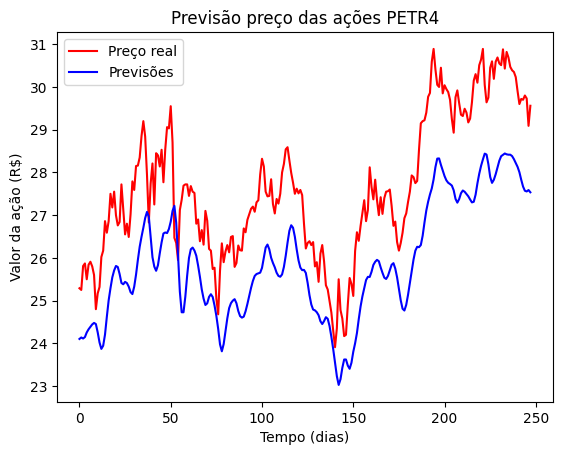

In [ ]:
print("Média previsões: R${:-f}".format(previsoes.mean()))
print("Média real: R${:.2f}".format(preco_real_teste.mean()))

plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações PETR4')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valor da ação (R$)')
plt.legend()
plt.show()

**Importando as bibliotecas**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


**Carregar e Preparar o Dataset**

In [ ]:
# Carregar o dataset (substitua 'dados_acoes.csv' pelo caminho do seu arquivo)
data = pd.read_csv('/home/PETR4.csv')

# Converter a coluna Date para o tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Selecionar apenas a coluna 'Close' para previsão
data = data[['Date', 'Close']].set_index('Date')

# Normalizar os dados para que fiquem entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Mostrar as primeiras linhas dos dados
data.head()


,Close
Date,
2014-01-27,15.11
2014-01-28,15.05
2014-01-29,14.80
2014-01-30,14.70
2014-01-31,14.70


**Criar Conjuntos de Treinamento e Teste**

In [ ]:
# Definir o tamanho da janela (look-back)
look_back = 90  # Usar os últimos 90 dias para previsão

# Criar sequências de dados para a RNN
def create_dataset(data, look_back=1):
    # Inicializa listas vazias para armazenar os dados de entrada (X) e saída (y)
    X, y = [], []

    # Itera sobre o conjunto de dados, parando antes do comprimento total menos o look_back
    for i in range(len(data) - look_back):
        # Adiciona uma janela de dados de entrada à lista X
        # O slice data[i:(i + look_back), 0] pega os dados desde o índice i até i + look_back; o valor 0 indica a coluna
        X.append(data[i:(i + look_back), 0])  # Dados de entrada

        # Adiciona o próximo valor (o que segue a janela de entrada) à lista y
        # O índice i + look_back se refere ao valor que queremos prever
        y.append(data[i + look_back, 0])      # Dados de saída

    # Converte as listas X e y em arrays NumPy e retorna
    return np.array(X), np.array(y)


# Criar os conjuntos de dados
X, y = create_dataset(scaled_data, look_back)

# Redimensionar os dados para [amostras, passos do tempo, características]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir em conjunto de treinamento e teste (80% para treinamento, 20% para teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Mostrar a forma dos conjuntos de dados
#(número de linhas,número de passos de tempo ou o look-back, número de colunas)
print(f'Treinamento: {X_train.shape}, Teste: {X_test.shape}')


Treinamento: (922, 90, 1), Teste: (231, 90, 1)


**Construir a Rede Neural Recorrente (RNN)**

In [ ]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Primeira camada LSTM
model.add(Dropout(0.2))  # Camada Dropout para evitar overfitting
model.add(LSTM(50, return_sequences=False))  # Segunda camada LSTM
model.add(Dropout(0.2))  # Camada Dropout
model.add(Dense(1))  # Camada de saída para previsão do preço

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar a arquitetura do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 90, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

**Treinar a RNN**

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Salvar o modelo se desejar
# model.save('modelo_acoes.h5')


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0502
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0062
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.

**Fazer Previsões**

In [ ]:
# Prever o próximo valor
last_data = scaled_data[-look_back:].reshape(1, look_back, 1)  # Últimos 90 dias para previsão
predicted_price = model.predict(last_data)  # Fazer a previsão

# Inverter a normalização para obter o preço real
predicted_price = scaler.inverse_transform(predicted_price)
print(f'Preço previsto para o dia seguinte: {predicted_price[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Preço previsto para o dia seguinte: 54.32


**Avaliação do Modelo (opcional)**

In [ ]:
# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Inverter a normalização das previsões
predictions = scaler.inverse_transform(predictions)

# Calcular RMSE
rmse = np.sqrt(np.mean(np.square(predictions - scaler.inverse_transform(y_test.reshape(-1, 1)))))
print(f'Root Mean Squared Error: {rmse:.2f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Root Mean Squared Error: 0.95


In [ ]:
# Prever as três próximas amostras
predicted_prices = []

# Usar os últimos 90 dias para começar
last_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for _ in range(3):  # Prever 3 dias
    predicted_price = model.predict(last_data)  # Fazer a previsão
    predicted_prices.append(predicted_price[0][0])  # Armazenar a previsão

    # Atualizar last_data para incluir a nova previsão
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Inverter a normalização para obter os preços reais
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Mostrar os preços previstos para os próximos 3 dias
for i, price in enumerate(predicted_prices, start=1):
    print(f'Preço previsto para o dia {i} a partir de 2020-01-24: {price[0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Preço previsto para o dia 1 a partir de 2020-01-24: 24.59
Preço previsto para o dia 2 a partir de 2020-01-24: 24.13
Preço previsto para o dia 3 a partir de 2020-01-24: 23.52


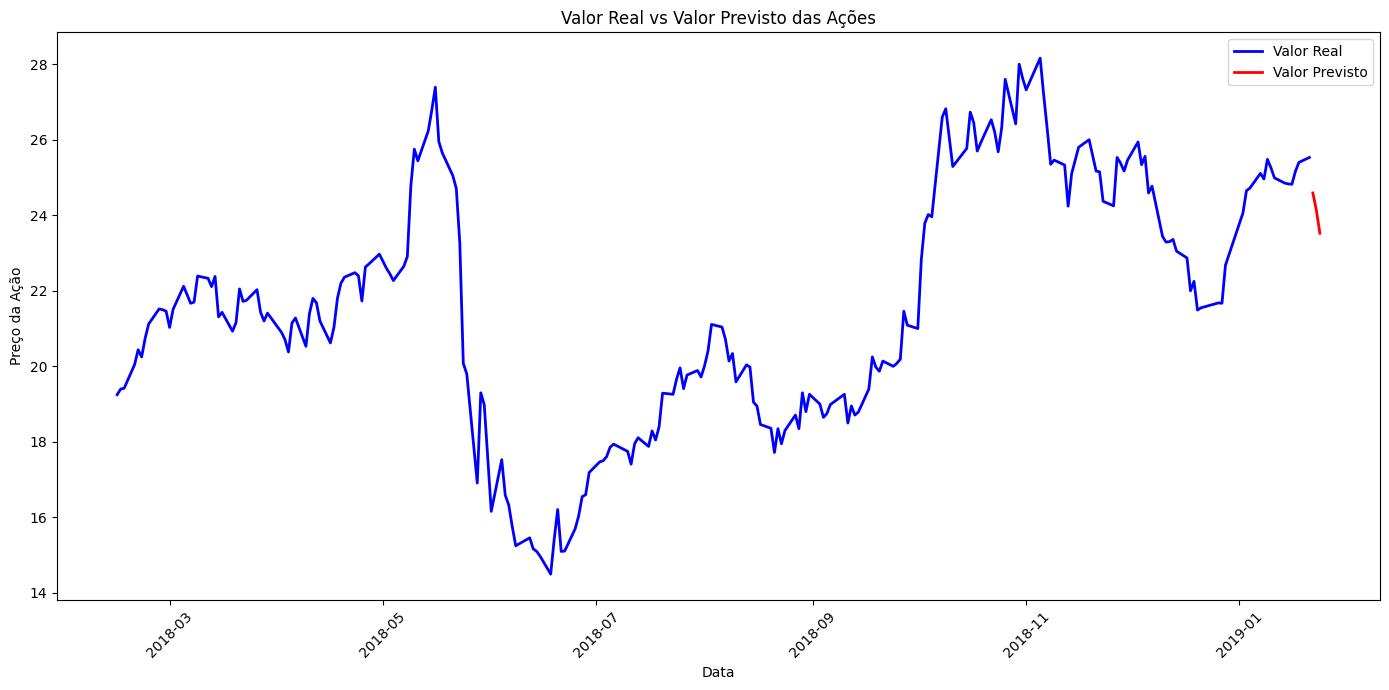

In [ ]:
# Plotar o gráfico dos valores reais e previstos

# Criar um DataFrame com os dados reais
real_prices = data['Close'].values[-(len(y_test) + 3):]  # Inclui os últimos valores reais + 3 previsões

# Concatenar as previsões com os preços previstos para os próximos 3 dias
predicted_prices_full = np.concatenate([predictions.flatten(), predicted_prices.flatten()])

# Criar o índice para os dias
dates = data.index[-(len(y_test) + 3):]  # Últimos índices

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(dates[:len(y_test)], real_prices[:len(y_test)], color='blue', label='Valor Real', linewidth=2)
plt.plot(dates[len(y_test):], predicted_prices_full[len(y_test):], color='red', label='Valor Previsto', linewidth=2)
plt.title('Valor Real vs Valor Previsto das Ações')
plt.xlabel('Data')
plt.ylabel('Preço da Ação')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Média das previsões: R$24.08
Média real: R$21.65


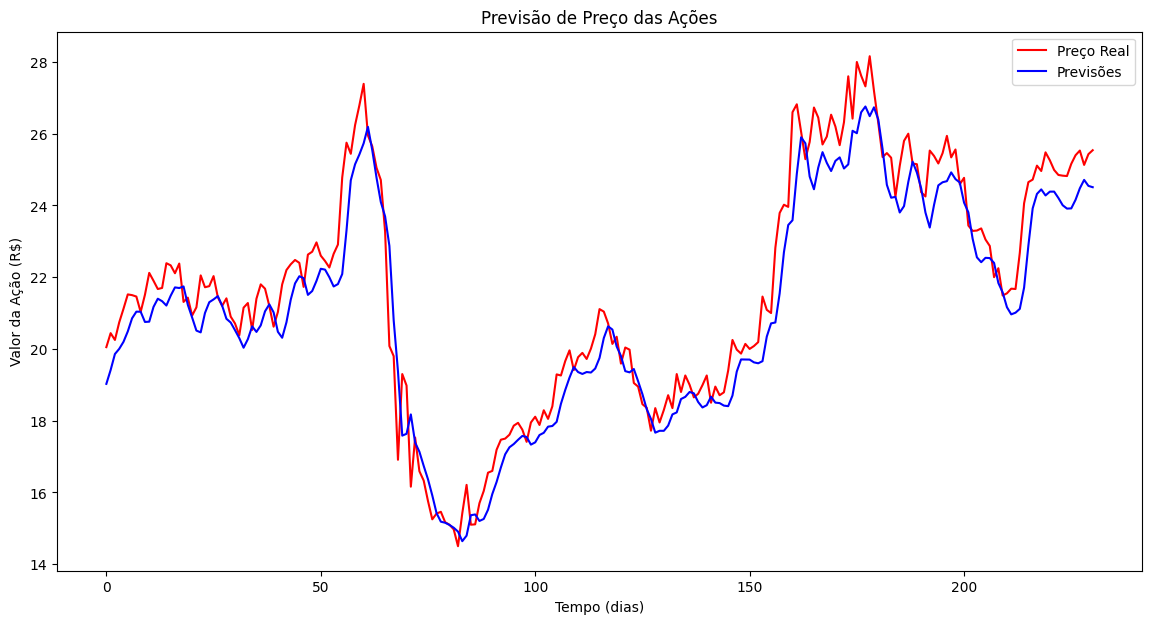

In [ ]:
# Calcular médias
media_previsoes = predicted_prices.flatten().mean()
media_real = scaler.inverse_transform(y_test.reshape(-1, 1)).mean()

print(f"Média das previsões: R${media_previsoes:.2f}")
print(f"Média real: R${media_real:.2f}")

# Plotar gráfico
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Preço Real')  # Preços reais
plt.plot(predictions, color='blue', label='Previsões')  # Previsões do conjunto de teste
plt.title('Previsão de Preço das Ações')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valor da Ação (R$)')
plt.legend()
plt.show()


**Refazendo sem normalizar**

In [ ]:
# Carregar o dataset (substitua 'dados_acoes.csv' pelo caminho do seu arquivo)
data = pd.read_csv('/home/PETR4.csv')

# Converter a coluna Date para o tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Selecionar apenas a coluna 'Close' para previsão
data = data[['Date', 'Close']].set_index('Date')

# Mostrar as primeiras linhas dos dados
data.head()


,Close
Date,
2014-01-27,15.11
2014-01-28,15.05
2014-01-29,14.80
2014-01-30,14.70
2014-01-31,14.70


In [ ]:
# Definir o tamanho da janela (look-back)
look_back = 90  # Usar os últimos 90 dias para previsão

# Criar sequências de dados para a RNN
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])  # Dados de entrada
        y.append(data[i + look_back])        # Dados de saída
    return np.array(X), np.array(y)

# Criar os conjuntos de dados
X, y = create_dataset(data['Close'].values, look_back)

# Redimensionar os dados para [amostras, passos do tempo, características]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir em conjunto de treinamento e teste (80% para treinamento, 20% para teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Mostrar a forma dos conjuntos de dados
print(f'Treinamento: {X_train.shape}, Teste: {X_test.shape}')


Treinamento: (922, 90, 1), Teste: (231, 90, 1)


In [ ]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Primeira camada LSTM
model.add(Dropout(0.2))  # Camada Dropout para evitar overfitting
model.add(LSTM(50, return_sequences=False))  # Segunda camada LSTM
model.add(Dropout(0.2))  # Camada Dropout
model.add(Dense(1))  # Camada de saída para previsão do preço

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar a arquitetura do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 90, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Salvar o modelo se desejar
# model.save('modelo_acoes.h5')


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 131.0590
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 54.7883
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.5671
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.7471
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.4138
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0320
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9370
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6456
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2471
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0403
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4923
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2615
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.6783
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0278
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - los

In [ ]:
# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Prever os próximos 3 dias
predicted_prices = []

# Usar os últimos 90 dias para começar
last_data = data['Close'].values[-look_back:]

for _ in range(3):  # Prever 3 dias
    last_data_reshaped = last_data.reshape(1, look_back, 1)
    predicted_price = model.predict(last_data_reshaped)  # Fazer a previsão
    predicted_prices.append(predicted_price[0][0])  # Armazenar a previsão

    # Atualizar last_data para incluir a nova previsão
    last_data = np.append(last_data[1:], predicted_price)  # Remover o primeiro valor e adicionar a previsão

# Mostrar previsões
predicted_prices = np.array(predicted_prices)
print("Previsões para os próximos 3 dias:", predicted_prices)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Previsões para os próximos 3 dias: [22.206694 22.11159  21.963902]


Média das previsões: R$22.09
Média real: R$21.65


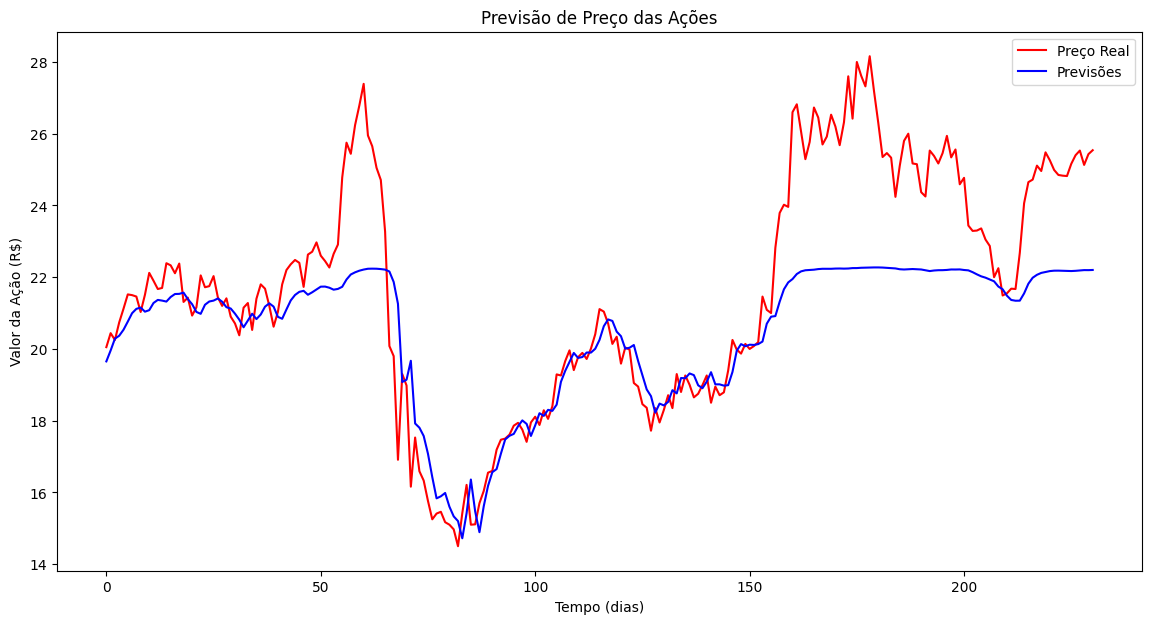

In [ ]:
# Calcular médias
media_previsoes = predicted_prices.mean()
media_real = y_test.mean()

print(f"Média das previsões: R${media_previsoes:.2f}")
print(f"Média real: R${media_real:.2f}")

# Plotar gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='red', label='Preço Real')  # Preços reais
plt.plot(predictions, color='blue', label='Previsões')  # Previsões do conjunto de teste
plt.title('Previsão de Preço das Ações')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valor da Ação (R$)')
plt.legend()
plt.show()
